In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
S=Base.classes.station
M=Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date=session.query(M.date).all()[-1][0]
last_date

'2017-08-23'

In [10]:
# Find the most recent date in the data set.
# session.query(func.max(M.date)).all()

In [11]:
# Find the most recent date in the data set.
# session.query(func.max(M.date)).first()

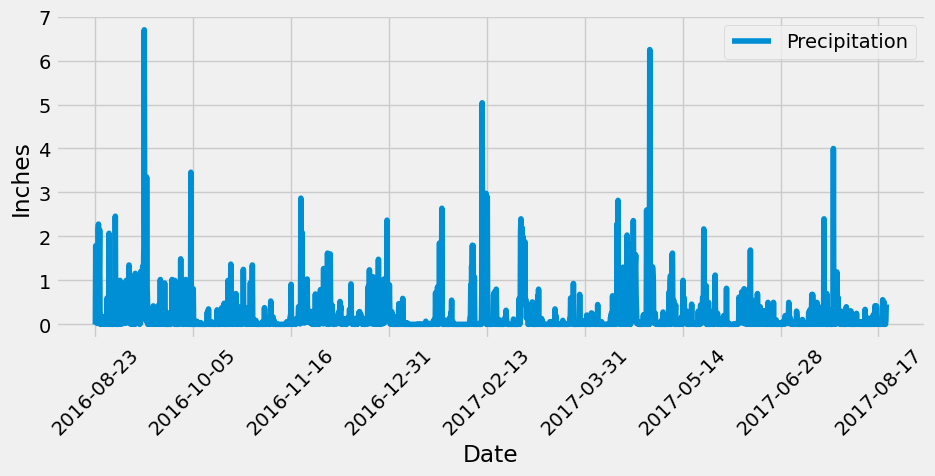

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
pre_year = dt.datetime.strptime(last_date, "%Y-%m-%d").date() - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
pre_year_weather= session.query(M.date,M.prcp).filter(M.date>=pre_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
pd.DataFrame(pre_year_weather,columns=["Date","Precipitation"])

# Sort the dataframe by date
DF=pd.DataFrame(pre_year_weather,columns=["Date","Precipitation"]).sort_values("Date").dropna().set_index("Date")
# Use Pandas Plotting with Matplotlib to plot the data
DF.plot(figsize=[10,4],rot=45, ylabel="Inches");

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
DF.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# session.query(func.count(S.station)).all()

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(S).count()

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(M.station,func.count(M.station)).group_by(M.station).order_by(func.count(M.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
mAs = session.query(M.station,func.count()).group_by(M.station).order_by(func.count().desc()).all()
mAs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
mAs = mAs[0][0]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(M.tobs),func.max(M.tobs),func.avg(M.tobs)).filter(M.station==mAs).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temparature')

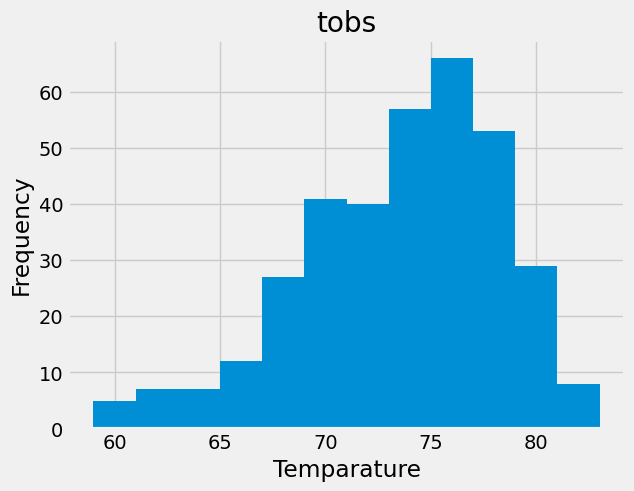

In [62]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results=session.query(M.tobs).filter((M.date>=pre_year)&(M.station==mAs)).all()
df=pd.DataFrame(results)
df.hist(bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temparature")

# Close Session

In [21]:
# Close Session
session.close()